Le but de ce TP est de mettre en oeuvre le classifieur Bayesien Naif sur les données MNIST. 
Pour se familiariser avec ces données voir [cette page](https://perso.limsi.fr/Individu/allauzen/webpages/pmwiki.php?n=Cours.Main#toc6). Elles sont également accessible en lecture et en local: 

    /partage/public/allauzen
    
Ce corpus rassemble des images (observations) de chiffres isolés et manuscrits ainsi que les classes associées (les labels ou les réponses attendues). Il s'agit donc d'un problème de classification à 10 classes (de 0 à 9). L'objectif est d'assigner le bon chiffre à une image. 

# Chargement des données

50000 training examples


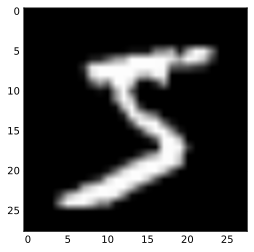

In [1]:
import cPickle, gzip, numpy
# Load the dataset
f = gzip.open('/Users/allauzen/data/mnist/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)

print str(len(train_set[0]))+" training examples"
f.close()
# exemple: 
im = train_set[0][0] # the first image
label = train_set[1][0] # its label

%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
import matplotlib

im = train_set[0][0]
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(im.reshape(28,28) , matplotlib.pyplot.cm.gray)


# Manipulation des données
Voici quelques exemples de manipulation. 

In [2]:
# Récupération des images et des labels
images = train_set[0]
labels = train_set[1]
print "shape d'images  :"+str(images.shape)
print "shape de labels :"+str(labels.shape)
# Combien y-a-t-il d'images de 5 
print "Nombre d'images dont le label est 5 :"+str((labels==5).sum())
# labels==5 retourne un ndarray de même dimension que labels mais remplit de boolean.
# True, si le label de la case est 5 et False sinon. 
# On peut se servir de cet ndarray pour faire du slicing de images
fives=images[labels==5]
print "fives contient toutes les images dont le label est 5, il y en a :"+str(fives.shape)


shape d'images  :(50000, 784)
shape de labels :(50000,)
Nombre d'images dont le label est 5 :4506
fives contient toutes les images dont le label est 5, il y en a :(4506, 784)


# Bayesien Naif (continu)
Les observations sont de nature continue. Chaque image contient 784 pixels dont la valeur est réelle et normalisée entre 0 et 1. On pourrait binariser ce type de données, mais ici nous allons les modéliser ainsi en utilisant des gaussiennes.

Une image est un vecteur de caractéristiques contenant 784 composantes. Partons de cette simple représentation. L'hypothèse naïve implique que chaque composante est indépendante des autres. Dans le cas présent, chaque pixel est donc modélisé par une gaussienne. La matrice de covariance est donc diagonale. 

## TODO
Implémenter le Bayesien naïf gaussien: 
* Calcul des paramètres à partir des données d'apprentissage
 * Pour chaque classe calculer le vecteur des moyennes
 * La matrice de covariance (Attention elle est diagonale, on peut avoir qu'un vecteur)
* Inférence sur les données de test
* Calcul du taux d'erreur
* Tracer les images "moyennes" pour chaque classe

